# Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing Dataset

In [59]:
vegdata = pd.read_csv('Veg.csv',encoding = "ISO-8859-1")
vegdata.head()

,Unnamed: 0,Date,Title,Snippet,Full Text,Url,Domain,Sentiment,Page Type,Author
0,2,2018-03-05 03:09:10.000,Photo by ngoctat1310,"H?i ?ó ch?a ?n chay, c? ch?c ch?n r?ng cu?c ??...","H?i ?ó ch?a ?n chay, c? ch?c ch?n r?ng cu?c ??...",https://www.instagram.com/p/Bf7QifgB7ph/,www.instagram.com,neutral,instagram,ngoctat1310
1,3,2018-03-05 02:26:45.000,Photo by huyenxian,Món m?i ? ?u ?àm: n?m thi?n môn. T?ng mi?ng c?...,Món m?i ? ?u ?àm: n?m thi?n môn. T?ng mi?ng c?...,https://www.instagram.com/p/Bf7LrzRAd7E/,www.instagram.com,neutral,instagram,huyenxian
2,4,2018-03-04 15:57:00.000,Carousel Post by minho.2,Bún ??u h? ti?m (bún v?t ti?m chay). ??u h? h?...,Bún ??u h? ti?m (bún v?t ti?m chay). ??u h? h?...,https://www.instagram.com/p/Bf6DnVFF9aj/,www.instagram.com,neutral,instagram,minho.2
3,5,2018-03-04 11:25:31.000,[Món Ngon M?i Ngày c?p nh?t]\n\nKh? qua r?t t?...,a thích ?n.món chay h?,a thích ?n.món chay h?,https://www.facebook.com/1711334922243345#chan...,www.facebook.com,neutral,facebook,NaN
4,6,2018-03-04 07:53:34.000,Photo by kbeedeng,Bây gi? c?ng nh? lúc ?ó.\nCon nh? ng?c ngh?ch....,Bây gi? c?ng nh? lúc ?ó.\nCon nh? ng?c ngh?ch....,https://www.instagram.com/p/Bf5MSnRg9r-/,www.instagram.com,positive,instagram,kbeedeng


# Checking Types Of our Variable

In [63]:
vegdata.dtypes

Unnamed: 0     int64
Date          object
Title         object
Snippet       object
Full Text     object
Url           object
Domain        object
Sentiment     object
Page Type     object
Author        object
dtype: object

In [4]:
vegdata['Page Type'].unique()

array(['instagram', 'facebook', 'forum', 'twitter', 'Tiki', 'Lazada',
       'Adayroi', 'Foody'], dtype=object)

# CountPlot of Social Media

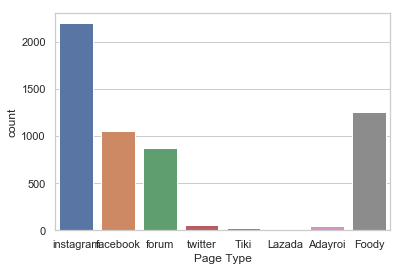

In [12]:
sns.set(style="whitegrid")
ax = sns.countplot(x="Page Type", data=vegdata)

In [60]:
vegdata['Sentiment'].unique()

array(['neutral', 'positive', 'negative', nan], dtype=object)

# Countplot of Sentiment

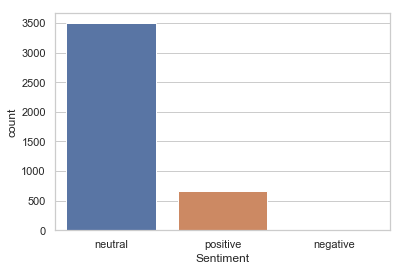

In [39]:
sns.set(style="whitegrid")
ax = sns.countplot(x="Sentiment", data=vegdata)

# "Full Text" Column assigned to text

In [65]:
text = vegdata.iloc[:, 4]
text.head()

0    H?i ?ó ch?a ?n chay, c? ch?c ch?n r?ng cu?c ??...
1    Món m?i ? ?u ?àm: n?m thi?n môn. T?ng mi?ng c?...
2    Bún ??u h? ti?m (bún v?t ti?m chay). ??u h? h?...
3                               a thích ?n.món chay h?
4    Bây gi? c?ng nh? lúc ?ó.\nCon nh? ng?c ngh?ch....
Name: Full Text, dtype: object

# Count of "Neutral", "Positive" & "Negative" Sentiments

In [71]:
Sentiment = vegdata.groupby('Sentiment')
df = Sentiment.size().sort_values(ascending=False).head()
print(df)

Sentiment
neutral     3498
positive     671
negative      11
dtype: int64


# All Reviews (VN)  As List of Words

In [1]:
file = open('VegFullTxt.txt', 'r')
x = file.readlines()
file.close()
vcorpus = ' '.join(x)
print(vcorpus[0:100])

Full Text
 "H?i ?ó ch?a ?n chay, c? ch?c ch?n r?ng cu?c ??i này ko th? nh?n ?n các món mình thích ??


# WordCloud for Vietnamese Words

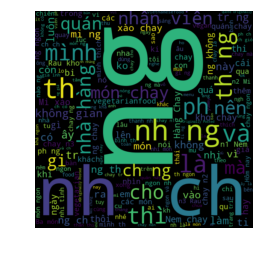

In [58]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=580, height=580, margin=0).generate(vcorpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<h2 style = "color:red" align = "center"> Google Translated Comments</h1>

# Importing Dataset

In [7]:
engVeg = pd.read_csv('Veg.tsv', delimiter = '\t', quoting = 3)
engVeg.head()
a = engVeg.iloc[:, 4]
b = engVeg.iloc[:, 10]
b.head()

0    There were no vegetarian, just to make sure th...
1    New items in Udumbara: mannequin meditation su...
2    Potential tofu bun (noodle vegetarian duck). S...
3                         a vegetarian like huh an.mon
4    Now and then. \ NThe little stupid. \ NThank y...
Name: Snippit Eng, dtype: object

In [8]:
engVeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523 entries, 0 to 5522
Data columns (total 11 columns):
Unnamed: 0     5523 non-null int64
Date           5523 non-null object
Title          4171 non-null object
Snippet        4180 non-null object
Full Text      5523 non-null object
Url            5523 non-null object
Domain         4180 non-null object
Sentiment      4180 non-null object
Page Type      5523 non-null object
Author         5513 non-null object
Snippit Eng    5523 non-null object
dtypes: int64(1), object(10)
memory usage: 474.7+ KB


# Checking Missing Values in our TSV (Tab Speateted) file.

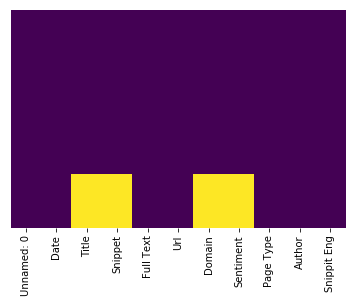

In [13]:
sns.heatmap(engVeg.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [14]:
engVeg.tail()

,Unnamed: 0,Date,Title,Snippet,Full Text,Url,Domain,Sentiment,Page Type,Author,Snippit Eng
5518,5520,via iPhone 8/2/2017 15:40,NaN,NaN,"Chay Rất thích ăn quán này, mẹ của bà chủ dễ t...",https://www.foody.vn/ho-chi-minh/quan-chay-qua...,NaN,NaN,Foody,Tuyết Nhi Lưu,"Enjoyed this restaurant vegetarian food, cute ..."
5519,5521,via Android 7/8/2016 14:17,NaN,NaN,"Quán chay Quan Âm Quán dễ tìm. Quán đông, hết ...",https://www.foody.vn/ho-chi-minh/quan-chay-qua...,NaN,NaN,Foody,Chocolate Dark,Quan Yin vegetarian restaurant is easy to find...
5520,5522,via iPhone 17/7/2016 20:55,NaN,NaN,"Nên thử Hôm qua mẹ mình ở quê lên, nhằm ngày m...",https://www.foody.vn/ho-chi-minh/quan-chay-qua...,NaN,NaN,Foody,Nhi.Nhii,Yesterday his mother should try at home up to ...
5521,5523,via Android 10/3/2016 22:02,NaN,NaN,Quán Chay Quan Âm Quán nằm trong hẻm nhưng khô...,https://www.foody.vn/ho-chi-minh/quan-chay-qua...,NaN,NaN,Foody,Rin,Quan Quan Quan Chay but space is located in th...
5522,5524,via iPhone 6/2/2016 20:05,NaN,NaN,"Quán chay theo kiểu Hoa, ngon Quán chay ngon, ...",https://www.foody.vn/ho-chi-minh/quan-chay-qua...,NaN,NaN,Foody,Thi Luong,"Chinese-style vegetarian, vegetarian delicious..."


# Creating Corpus From Comments

In [12]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 3000):
    review = re.sub('[^a-zA-Z]', ' ', engVeg['Snippit Eng'][i])
    review = review.lower()
    review = review.split()
    #ps = PorterStemmer()
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
print(corpus[0:15])

['vegetarian make sure life fasting dishes like habit suffer small appetite like something eat using despite eating day ngio n buddha vegetarian lovevegetarian', 'new items udumbara mannequin meditation subjects jicama pieces neatly round cut clamp coconut apples sliced served sweet apple sauce nmon nhe pole summer n vegan vegetarian vegetarianfood vietnamfood vegetarianlifestyle vegetarianlunch vegetarianfoodporn', 'potential tofu bun noodle vegetarian duck soy tofu stew nsmoothie spinach banana n nta said lately swine eat bar scene v n n healthyfood vegetarian vietnamesefood lovecooking', 'vegetarian like huh mon', 'nthe little stupid nthank everything n n khanh ootdvietnam kbeephoto kbeedeng ootd couplegoals pixiehair shorthair tomboystyle dailylook tomboylookbook vietnamese ghg saigonese minimalism lookbook vegetarian thaifood menswear menstyle igdaily travelgram travel', 'associate without emotion hi one vibration girls boys aircraft understand people understand beings spectrum n 

# Wordcloud For Google Transleted Comments

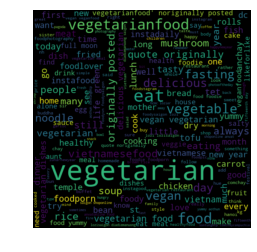

In [44]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=580, height=580, margin=0).generate(corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Creating Corpus from Text File and Printing Sentences

In [77]:
import os
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
corpus = PlaintextCorpusReader(os.getcwd(),"Veg_Eng.txt", encoding = "ISO-8859-1" )
sentences = corpus.sents() 
print(sentences) 

[['Snippit', 'Eng', 'there', 'were', 'no', 'vegetarian', 'just', 'to', 'make', 'sure', 'that', 'this', 'life', 'can', 'not', 'be', 'fasting', 'dishes', 'you', 'like', 'because', 'the', 'habit', 'suffer', 'from', 'small', 'appetite', 'like', 'something', 'to', 'eat', 'for', 'using', 'it', 'despite', 'eating', 'day', 'ngio', 'other', 'then', 'n', 'buddha', 'vegetarian', 'lovevegetarian', '??'], ['new', 'items', 'in', 'udumbara', 'mannequin', 'meditation', 'subjects', 'jicama', 'pieces', 'neatly', 'round', 'cut', 'clamp', 'up', 'in', 'the', 'coconut', 'and', 'apples', 'sliced', 'served', 'with', 'sweet', 'apple', 'sauce', 'this', 'nmon', 'nhe', '??'], ...]


# Count Word Frequency

In [78]:
course_freq_dist = nltk.FreqDist(corpus.words())
print("Top 10 words in the Corpus: ", course_freq_dist.most_common(1))

Top 10 words in the Corpus:  [('vegetarian', 6386)]


# List Most Common Words with Freq 

In [30]:
# Print most common words
course_freq_dist = nltk.FreqDist(corpus.words())
print("Top 10 words in the Corpus: ", course_freq_dist.most_common(100))

Top 10 words in the Corpus:  [('vegetarian', 6386), ('the', 5923), ('n', 4736), ('to', 4295), ('is', 3079), ('and', 2881), ('not', 2278), ('food', 2031), ('eat', 1952), ('but', 1883), ('of', 1691), ('a', 1617), ('delicious', 1617), ('??', 1458), ('i', 1435), ('in', 1346), ('with', 1295), ('for', 1290), ('dishes', 1274), ('very', 1251), ('also', 1240), ('this', 1220), ('restaurant', 1200), ('that', 1147), ('fried', 1091), ('are', 988), ('you', 936), ('rice', 905), ('k', 894), ('it', 865), ('so', 836), ('should', 816), ('here', 763), ('his', 741), ('too', 739), ('go', 721), ('vegetables', 700), ('always', 699), ('do', 698), ('?', 687), ('shop', 667), ('on', 667), ('as', 649), ('tasty', 640), ('like', 629), ('dish', 609), ('more', 606), ('then', 600), ('soup', 594), ('space', 586), ('good', 580), ('day', 560), ('just', 545), ('quite', 537), ('staff', 537), ('from', 520), ('tofu', 517), ('by', 515), ('noodles', 514), ('or', 508), ('eating', 502), ('time', 498), ('was', 488), ('vegetarianfo

# Creating token from text file of reviews

In [13]:
#Read the base file into a raw text variable
base_file = open(os.getcwd()+ "/Veg_Eng.txt", 'rt')
raw_text = base_file.read()
base_file.close()

#Extract tokens
token_list = nltk.word_tokenize(raw_text)
print("Token List : ", token_list[:20])
print("\n Total Tokens : ", len(token_list))

Token List :  ['Snippit', 'Eng', 'there', 'were', 'no', 'vegetarian', 'just', 'to', 'make', 'sure', 'that', 'this', 'life', 'can', 'not', 'be', 'fasting', 'dishes', 'you', 'like']

 Total Tokens :  222275


# Removing punctuations

In [14]:
#Use the punkt library to extracr tokens
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print("Token List after removing the punctuation: ", token_list2[:20])
print("\n Total Tokens after removing the punctuation : ", len(token_list2))

Token List after removing the punctuation:  ['Snippit', 'Eng', 'there', 'were', 'no', 'vegetarian', 'just', 'to', 'make', 'sure', 'that', 'this', 'life', 'can', 'not', 'be', 'fasting', 'dishes', 'you', 'like']

 Total Tokens after removing the punctuation :  211815


# Removing Stop Words

In [16]:
#Download the standard stopword list
#nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
corpus = list(filter(lambda token: token not in stopwords.words('english'), token_list2))
print("Token list after stopword removal: ", corpus[:20])
print("\nTotal tokens after stopword removal : ", len(corpus))

Token list after stopword removal:  ['Snippit', 'Eng', 'vegetarian', 'make', 'sure', 'life', 'fasting', 'dishes', 'like', 'habit', 'suffer', 'small', 'appetite', 'like', 'something', 'eat', 'using', 'despite', 'eating', 'day']

Total tokens after stopword removal :  152734


# Frequency Count After Cleaning the Text

In [20]:
from collections import Counter
freq = Counter(corpus).most_common(250)
print(freq)

[('vegetarian', 6386), ('n', 4736), ('food', 2031), ('eat', 1952), ('delicious', 1617), ('dishes', 1274), ('also', 1240), ('restaurant', 1200), ('fried', 1091), ('rice', 905), ('k', 894), ('go', 721), ('vegetables', 700), ('always', 699), ('shop', 667), ('tasty', 640), ('like', 629), ('dish', 609), ('soup', 594), ('space', 586), ('good', 580), ('day', 560), ('quite', 537), ('staff', 537), ('tofu', 517), ('noodles', 514), ('eating', 502), ('time', 498), ('vegetarianfood', 487), ('vegan', 475), ('people', 466), ('price', 448), ('salad', 444), ('warehouse', 442), ('rolls', 430), ('slightly', 428), ('sauce', 418), ('grapefruit', 398), ('fasting', 392), ('taste', 384), ('new', 380), ('peel', 379), ('many', 376), ('mushrooms', 374), ('little', 364), ('vegetarians', 362), ('see', 354), ('still', 345), ('much', 340), ('service', 338), ('full', 336), ('one', 330), ('back', 330), ('mushroom', 324), ('vietnamesefood', 321), ('water', 316), ('well', 312), ('bar', 309), ('nem', 308), ('hot', 299), 

# Converinting list to string for wordcloud

In [19]:
#corpus = ''
#corpus = corpus + token_list4

list1 = corpus
vcorpus = ' '.join(list1)
print(vcorpus[0:500])
#course_freq_dist = nltk.FreqDist(vcorpus.words())
#print("Top 10 words in the Corpus: ", course_freq_dist.most_common(100))

Snippit Eng vegetarian make sure life fasting dishes like habit suffer small appetite like something eat using despite eating day ngio n buddha vegetarian lovevegetarian new items udumbara mannequin meditation subjects jicama pieces neatly round cut clamp coconut apples sliced served sweet apple sauce nmon nhe pole summer n vegan vegetarian vegetarianfood vietnamfood vegetarianlifestyle vegetarianlunch vegetarianfoodporn potential tofu bun noodle vegetarian duck soy tofu stew nsmoothie spinach b


# Wordcloud For Cleaned Text

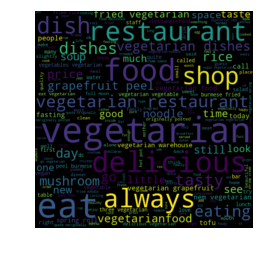

In [85]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=580, height=580, margin=0).generate(vcorpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Repeating Same process for Positive reviews only

In [21]:
#Read the base file into a raw text variable
base_file = open(os.getcwd()+ "/positive.txt", 'rt')
raw_text = base_file.read()
base_file.close()

#Extract tokens
token_list = nltk.word_tokenize(raw_text)
print("Token List : ", token_list[:20])
print("\n Total Tokens : ", len(token_list))


Token List :  ['Snippit', 'Eng', 'now', 'and', 'then', 'nthe', 'little', 'stupid', 'nthank', 'you', 'for', 'everything', 'n', '?', '?', '?', '?', '?', '?', 'n']

 Total Tokens :  23619


In [22]:
#Extract tokens
token_list = nltk.word_tokenize(raw_text)
print("Token List : ", token_list[:20])
print("\n Total Tokens : ", len(token_list))
#Use the punkt library to extracr tokens
token = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print("Token List after removing the punctuation: ", token[:20])
print("\n Total Tokens after removing the punctuation : ", len(token))

Token List :  ['Snippit', 'Eng', 'now', 'and', 'then', 'nthe', 'little', 'stupid', 'nthank', 'you', 'for', 'everything', 'n', '?', '?', '?', '?', '?', '?', 'n']

 Total Tokens :  23619
Token List after removing the punctuation:  ['Snippit', 'Eng', 'now', 'and', 'then', 'nthe', 'little', 'stupid', 'nthank', 'you', 'for', 'everything', 'n', 'n', 'khanh', 'ootdvietnam', 'kbeephoto', 'kbeedeng', 'ootd', 'couplegoals']

 Total Tokens after removing the punctuation :  21148


In [23]:
#Download the standard stopword list
#nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
pcorpus = list(filter(lambda token: token not in stopwords.words('english'), token))
print("Token list after stopword removal: ", pcorpus[:20])
print("\nTotal tokens after stopword removal : ", len(pcorpus))

Token list after stopword removal:  ['Snippit', 'Eng', 'nthe', 'little', 'stupid', 'nthank', 'everything', 'n', 'n', 'khanh', 'ootdvietnam', 'kbeephoto', 'kbeedeng', 'ootd', 'couplegoals', 'pixiehair', 'shorthair', 'tomboystyle', 'dailylook', 'tomboylookbook']

Total tokens after stopword removal :  17906


# Most Commen words From Positive Comment

In [24]:
from collections import Counter
freq = Counter(pcorpus).most_common(200)
print(freq)

[('n', 1030), ('vegetarian', 664), ('food', 268), ('yummy', 265), ('eat', 195), ('delicious', 190), ('foodporn', 143), ('instafood', 138), ('vietnamesefood', 133), ('vegan', 132), ('vegetarianfood', 106), ('foodie', 96), ('vietnam', 95), ('tasty', 89), ('vegetables', 82), ('saigon', 80), ('lunch', 79), ('love', 79), ('day', 78), ('instagood', 76), ('rice', 75), ('instadaily', 73), ('noodles', 67), ('healthy', 66), ('foody', 65), ('healthyfood', 64), ('tofu', 57), ('likelike', 55), ('foodstagram', 55), ('foodlover', 55), ('yum', 53), ('fried', 52), ('vietnamese', 51), ('dinner', 51), ('always', 48), ('cooking', 48), ('k', 46), ('noodle', 46), ('soup', 45), ('happy', 44), ('like', 44), ('comchay', 43), ('go', 42), ('also', 42), ('veganfood', 42), ('today', 41), ('fasting', 40), ('eating', 38), ('hcmc', 37), ('home', 37), ('new', 37), ('sauce', 36), ('breakfast', 35), ('mushrooms', 35), ('foodphotography', 35), ('good', 33), ('cook', 33), ('hungry', 32), ('eatclean', 32), ('instagram', 32

# Converting above list into a string for wordcloud

In [25]:
corpus = ' '.join(corpus)
print(corpus[0:500])

Snippit Eng vegetarian make sure life fasting dishes like habit suffer small appetite like something eat using despite eating day ngio n buddha vegetarian lovevegetarian new items udumbara mannequin meditation subjects jicama pieces neatly round cut clamp coconut apples sliced served sweet apple sauce nmon nhe pole summer n vegan vegetarian vegetarianfood vietnamfood vegetarianlifestyle vegetarianlunch vegetarianfoodporn potential tofu bun noodle vegetarian duck soy tofu stew nsmoothie spinach b


# WordCloud of Positive Comments

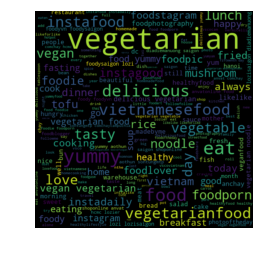

In [95]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=580, height=580, margin=0).generate(corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Repeating Same process for Neutral reviews only


In [26]:
#Read the base file into a raw text variable
base_file = open(os.getcwd()+ "/neutral.txt", 'rt')
raw_text = base_file.read()
base_file.close()

#Extract tokens
neutral = nltk.word_tokenize(raw_text)
print("Token List : ", neutral[:20])
print("\n Total Tokens : ", len(neutral))

Token List :  ['Snippit', 'Eng', "''", 'There', 'were', 'no', 'vegetarian', ',', 'just', 'to', 'make', 'sure', 'that', 'this', 'life', 'can', 'not', 'be', 'fasting', 'dishes']

 Total Tokens :  115382


In [27]:
#Extract tokens
neutral = nltk.word_tokenize(raw_text)
print("Token List : ", neutral[:20])
print("\n Total Tokens : ", len(neutral))
#Use the punkt library to extracr tokens
neutral = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, neutral))
print("Token List after removing the punctuation: ", neutral[:20])
print("\n Total Tokens after removing the punctuation : ", len(neutral))

Token List :  ['Snippit', 'Eng', "''", 'There', 'were', 'no', 'vegetarian', ',', 'just', 'to', 'make', 'sure', 'that', 'this', 'life', 'can', 'not', 'be', 'fasting', 'dishes']

 Total Tokens :  115382
Token List after removing the punctuation:  ['Snippit', 'Eng', 'There', 'were', 'no', 'vegetarian', 'just', 'to', 'make', 'sure', 'that', 'this', 'life', 'can', 'not', 'be', 'fasting', 'dishes', 'you', 'like']

 Total Tokens after removing the punctuation :  79372


In [28]:
#Download the standard stopword list
#nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
corpusn = list(filter(lambda token: token not in stopwords.words('english'), neutral))
print("Token list after stopword removal: ", corpusn[:20])
print("\nTotal tokens after stopword removal : ", len(corpusn))

Token list after stopword removal:  ['Snippit', 'Eng', 'There', 'vegetarian', 'make', 'sure', 'life', 'fasting', 'dishes', 'like', 'habit', 'suffer', 'small', 'appetite', 'like', 'something', 'eat', 'using', 'despite', 'eating']

Total tokens after stopword removal :  63616


# Most Common Word From Neutral Reviews Only

In [29]:
from collections import Counter
freq = Counter(corpusn).most_common(250)
print(freq)

[('vegetarian', 3552), ('n', 2215), ('eat', 540), ('Vegetarian', 526), ('fried', 491), ('food', 451), ('vegetarianfood', 375), ('grapefruit', 372), ('peel', 369), ('warehouse', 353), ('dishes', 323), ('I', 311), ('n1', 278), ('n2', 278), ('n3', 278), ('vegan', 276), ('Posted', 272), ('Nem', 264), ('also', 263), ('N', 248), ('delicious', 244), ('Three', 240), ('fasting', 237), ('vegetables', 236), ('vegetarians', 235), ('1', 232), ('Burmese', 227), ('Quote', 220), ('day', 200), ('rice', 200), ('vietnamesefood', 186), ('sauce', 181), ('Vegetables', 181), ('go', 176), ('noodles', 174), ('people', 172), ('like', 167), ('always', 167), ('N.', 167), ('rolls', 161), ('Originally', 161), ('meat', 157), ('soup', 155), ('3', 154), ('instafood', 146), ('foodporn', 143), ('tofu', 142), ('eating', 131), ('Nguyen', 130), ('vietnam', 125), ('full', 123), ('lunch', 123), ('veganfood', 118), ('still', 117), ('spring', 114), ('healthy', 112), ('nOriginally', 111), ('cook', 108), ('shrimp', 107), ('This'

In [30]:
corpusn = ' '.join(corpusn)
print(corpusn[0:500])

Snippit Eng There vegetarian make sure life fasting dishes like habit suffer small appetite like something eat using despite eating day NGio N buddha vegetarian lovevegetarian New items Udumbara mannequin meditation subjects Jicama pieces neatly round cut clamp coconut apples sliced served sweet apple sauce This nMon nhe pole summer N vegan vegetarian vegetarianfood vietnamfood vegetarianlifestyle vegetarianlunch vegetarianfoodporn Potential tofu bun noodle vegetarian duck Soy tofu stew NSmoothi


# Word Cloud for Neutral Reviews

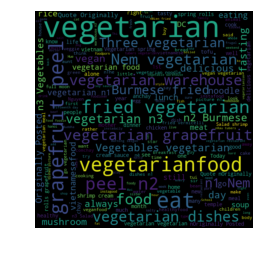

In [120]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=580, height=580, margin=0).generate(corpusn)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()